Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Populating the interactive namespace from numpy and matplotlib


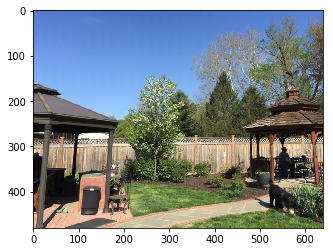

tail number, prediction


/home/test/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/test/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


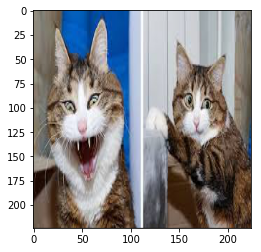

[[0.8748984  0.12510161]]
1, cat


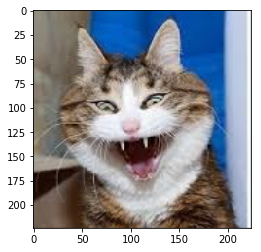

[[0.81486356 0.18513644]]
2, cat


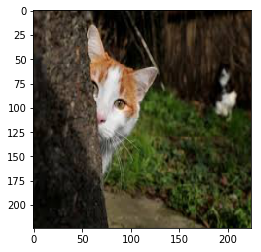

[[0.80489767 0.19510236]]
3, cat


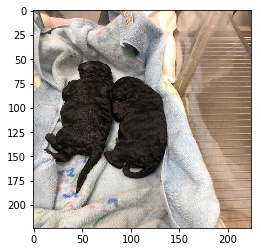

[[0.7968358  0.20316426]]
4, cat


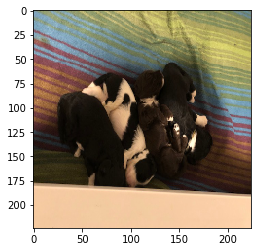

[[0.7746013  0.22539878]]
5, cat


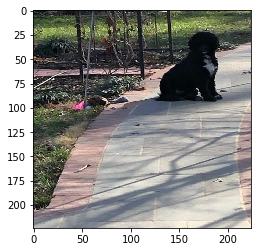

[[0.8380101  0.16198996]]
6, cat


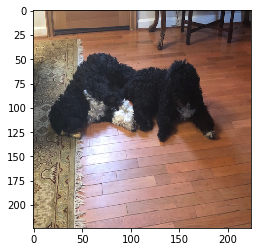

[[0.8210076  0.17899247]]
7, cat


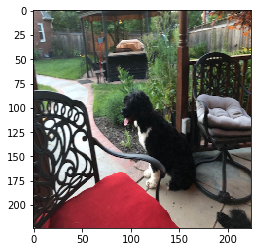

[[0.8263699  0.17363013]]
8, cat


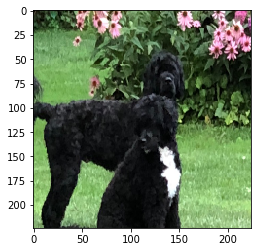

[[0.7982216 0.2017784]]
9, cat


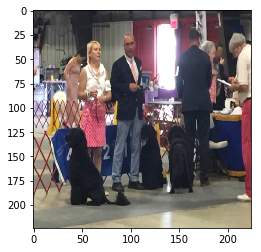

[[0.756046   0.24395397]]
10, cat


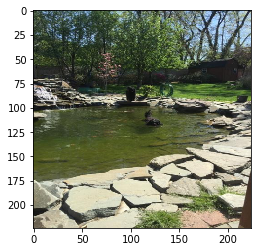

[[0.85804445 0.14195552]]
11, cat


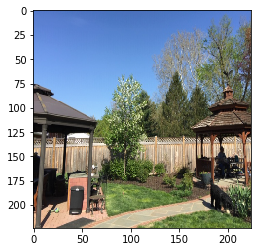

[[0.9080854  0.09191454]]
12, cat


In [1]:
#load the trained model into memory
from tensorflow.python.keras.models import load_model
WEIGHTS_FINAL = 'model-cropped-final.h5'
loaded_model = load_model(WEIGHTS_FINAL)
#run the trained model against a picture
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#myTestImg=mpimg.imread('./sample/train/dogs/dog.201.jpg')
myTestImg=mpimg.imread('./sample/test/test12.jpg')
imgplot = plt.imshow(myTestImg)
plt.show()
def dwrite(s, fout):
    print(s)
    fout.write(s)
    fout.write('\n')

# from tensorflow.python.keras.backend import resize_images
#import cv2
from skimage.transform import resize

fout = open('./sample/output/inference.csv','w')

dwrite('tail number, prediction', fout)
for i in range(1,13):
    myTestImg=mpimg.imread('./sample/test/test{0}.jpg'.format(i))
    #myTestImg = cv2.resize(myTestImg, (224,224))
    myTestImg = resize(myTestImg, (224, 224))
    imgplot = plt.imshow(myTestImg)
    plt.show()
    prediction = loaded_model.predict(array([myTestImg]),  steps=1)
    print(prediction)
    if prediction[0][0] < .1:
        dwrite('{}, dog'.format(i), fout)
    else:
        dwrite('{}, cat'.format(i), fout)

fout.close()